In [ ]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Set up the display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Moving Polygon")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Polygon properties
polygon_points = [(0, -20), (10, 10), (-10, 10)]  # Triangle shape
x, y = width // 2, height // 2  # Initial position
angle = 0  # Initial angle
speed = 5  # Movement speed

# Game loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Handle key presses
    keys = pygame.key.get_pressed()
    dx, dy = 0, 0
    if keys[pygame.K_LEFT]:
        dx = -speed
    if keys[pygame.K_RIGHT]:
        dx = speed
    if keys[pygame.K_UP]:
        dy = -speed
    if keys[pygame.K_DOWN]:
        dy = speed

    # Update position
    x += dx
    y += dy

    # Update angle if moving
    if dx != 0 or dy != 0:
        angle = math.atan2(dy, dx)

    # Clear the screen
    screen.fill(BLACK)

    # Rotate and draw the polygon
    rotated_points = []
    for point in polygon_points:
        rotated_x = point[0] * math.cos(angle) - point[1] * math.sin(angle)
        rotated_y = point[0] * math.sin(angle) + point[1] * math.cos(angle)
        rotated_points.append((rotated_x + x, rotated_y + y))

    pygame.draw.polygon(screen, WHITE, rotated_points, 2)  # 2 is the line thickness

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(60)

# Quit Pygame
pygame.quit()

In [2]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Set up the display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Moving Polygon")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Polygon properties
polygon_points = [(0, -20), (10, 10), (-10, 10)]  # Triangle shape
x, y = width // 2, height // 2  # Initial position
angle = 0  # Initial angle
speed = 5  # Movement speed

# Create a surface for the polygon
polygon_size = 50
polygon_surface = pygame.Surface((polygon_size, polygon_size), pygame.SRCALPHA)
pygame.draw.polygon(polygon_surface, WHITE, 
                    [(p[0] + polygon_size//2, p[1] + polygon_size//2) for p in polygon_points], 2)

# Game loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Handle key presses
    keys = pygame.key.get_pressed()
    dx, dy = 0, 0
    if keys[pygame.K_LEFT]:
        dx = -speed
    if keys[pygame.K_RIGHT]:
        dx = speed
    if keys[pygame.K_UP]:
        dy = -speed
    if keys[pygame.K_DOWN]:
        dy = speed

    # Update position
    x += dx
    y += dy

    # Update angle if moving
    if dx != 0 or dy != 0:
        angle = math.atan2(dy, dx)

    # Clear the screen
    screen.fill(BLACK)

    # Rotate the polygon surface
    rotated_surface = pygame.transform.rotate(polygon_surface, -math.degrees(angle))
    
    # Get the rect of the rotated surface and position it
    rect = rotated_surface.get_rect(center=(x, y))

    # Draw the rotated surface
    screen.blit(rotated_surface, rect.topleft)

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(60)

# Quit Pygame
pygame.quit()

In [ ]:
import matplotlib.pyplot as plt
from utils.lerp import Lerp
import numpy as np
import math
lerpEx = Lerp()
lnsp = np.linspace(0, 1, 50)
a = 0
b = 10
k = []

def doStuff(lerp):
    lerp.drive() 
    v = lerpEx.Sinusoidal(-1, 1, 5) * lerpEx.easeOut(1, 0)
    # v = lerpEx.easeOut(1, 0)
    k.append(v)  

while lerpEx.do(3000, doStuff).isDone() == False:
    pass


    

plt.plot(k)
plt.show()

    



In [10]:
ite = [1,2,3,4,5,6,7,8,9]
r = tuple(map(lambda x : x + 2, ite))
print(r)

(3, 4, 5, 6, 7, 8, 9, 10, 11)


In [10]:
from utils.lerp import Lerp
import time
l1 = Lerp()


def call1(lerp):
    # lerp.drive()
    return lerp.linear(0, 10)
    
def call2(lerp):
    # lerp.drive()
    return lerp.ease_in(0, 20)

In [11]:
# duration = 3000
t1 = time.time() * 1000
t2 = 0
done = False
# while t2 - t1 < duration:
while done == False:
    # t2 = time.time() * 1000
    # time.sleep(0.1)
    time.sleep(1/60)
    # m = l1.do(500, call1).andThen(500, call2).andWait(500).andThen(500, call2, lambda: print('done'))
    m = l1.do(10000, call1, lambda: print('done'))
    print(m.value)
    done = m.is_done
    


0.016666666666666666
0.03333333333333333
0.05
0.06666666666666667
0.08333333333333334
0.10000000000000002
0.1166666666666667
0.13333333333333333
0.15
0.16666666666666666
0.1833333333333333
0.19999999999999996
0.21666666666666665
0.23333333333333328
0.24999999999999994
0.2666666666666666
0.2833333333333333
0.3
0.3166666666666667
0.33333333333333337
0.35000000000000003
0.36666666666666675
0.3833333333333334
0.40000000000000013
0.4166666666666668
0.43333333333333346
0.4500000000000002
0.46666666666666684
0.4833333333333335
0.5000000000000002
0.5166666666666668
0.5333333333333335
0.5500000000000002
0.5666666666666668
0.5833333333333334
0.6
0.6166666666666666
0.6333333333333333
0.6499999999999999
0.6666666666666665
0.6833333333333331
0.6999999999999997
0.7166666666666665
0.7333333333333331
0.7499999999999997
0.7666666666666664
0.783333333333333
0.7999999999999996
0.8166666666666662
0.8333333333333328
0.8499999999999994
0.866666666666666
0.8833333333333326
0.8999999999999992
0.91666666666666

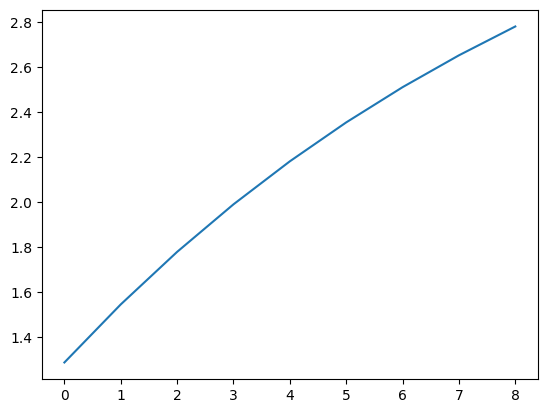

In [41]:
import math
import matplotlib.pyplot as plt

def asymptotic_value(min_value, max_value, rate, time):
    return max_value - (max_value - min_value) * math.exp(-rate * time)

k = []
for i in range(1, 10):
    # k.append(math.log(i)*.08)
    v = asymptotic_value(1, 4, .1, i)
    k.append(v)
    
plt.plot(k)
plt.show()


In [36]:

from PIL import Image, ImageFilter, ImageEnhance, ImageChops


def add_glow1(image_path, output_path, glow_amount = 2.0, blur_radius = 25):
    original = Image.open(image_path)
    
    if original.mode != 'RGBA':
        original = original.convert('RGBA')
        
    glow = original.copy()
    
    enhance = ImageEnhance.Brightness(glow)
    glow = enhance.enhance(glow_amount)
    
    glow = glow.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    
    result = Image.new('RGBA', original.size, (0, 0, 0, 0))
    
    result.paste(glow, (0, 0), glow)
    
    result.paste(original, (0, 0), original)
    
    result.save(output_path, 'PNG')
    
    return result





def add_glow2(image_path, output_path, glow_amount=1.5, blur_radius=25):
    """
    Add a glow effect to an image.
    
    Parameters:
    image_path (str): Path to the input image
    output_path (str): Path where the processed image will be saved
    glow_amount (float): Intensity of the glow effect (default: 1.5)
    blur_radius (int): Radius of the blur for the glow (default: 25)
    """
    # Open and convert image to RGBA
    with Image.open(image_path) as img:
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
        
        # Create the glow effect
        glow = img.copy()
        
        # Create alpha mask
        alpha = glow.split()[3]
        
        # Convert to RGB for brightness enhancement
        glow = glow.convert('RGB')
        
        # Enhance brightness
        enhancer = ImageEnhance.Brightness(glow)
        glow = enhancer.enhance(glow_amount)
        
        # Apply blur
        glow = glow.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        
        # Convert back to RGBA
        glow = glow.convert('RGBA')
        
        # Restore original alpha
        glow.putalpha(alpha)
        
        # Merge original and glow images
        result = ImageChops.add(img, glow, scale=2.0)
        
        # Save the result
        result.save(output_path, 'PNG')
        
        return result



def add_glow3(input_image, output_image, glow_amount=2):
    
    image = Image.open(input_image)

    # Apply a Gaussian blur to create the glow effect
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=10))

    # Enhance the brightness of the blurred image
    enhancer = ImageEnhance.Brightness(blurred_image)
    glow_image = enhancer.enhance(glow_amount)

    # Blend the original image and the "glow" image
    result = Image.blend(image, glow_image, alpha=.5)

    # Save or display the final image
    # final_image.show()
    result.save(output_image, 'PNG')
    
    return result


def add_glow4(input_image, output_image, glow_amount=2):

    # Load the image with transparency
 
    image = Image.open(input_image).convert("RGBA")

    # Increase the canvas size to accommodate the glow
    border_size = 20  # Adjust as needed for more glow
    new_size = (image.width + 2 * border_size, image.height + 2 * border_size)
    glow_base = Image.new("RGBA", new_size, (0, 0, 0, 0))
    glow_base.paste(image, (border_size, border_size))

    # Extract the alpha channel to use as a mask for the glow
    alpha = glow_base.getchannel("A")

    # Create the glow effect by blurring the alpha channel
    glow = alpha.filter(ImageFilter.GaussianBlur(radius=15))

    # Add color to the glow (e.g., a soft white glow)
    colored_glow = Image.new("RGBA", new_size, (255, 255, 255, 0))
    colored_glow.putalpha(glow)

    # Combine the glow with the original image
    final_image = Image.alpha_composite(glow_base, colored_glow)

    # Save or display the final image
    # final_image.show()
    final_image.save(output_image)
    return final_image


def add_glow5(input_image, output_image, glow_amount=2):


    # Load the image with transparency
    image = Image.open(input_image).convert("RGBA")

    # Increase the canvas size to accommodate the glow
    border_size = 20  # Adjust as needed for more glow
    new_size = (image.width + 2 * border_size, image.height + 2 * border_size)
    glow_base = Image.new("RGBA", new_size, (0, 0, 0, 0))
    glow_base.paste(image, (border_size, border_size))

    # Extract the alpha channel
    alpha = glow_base.getchannel("A")

    # Create a mask for the edges (outer edges only)
    # Dilate the alpha to grow outward
    dilated = alpha.filter(ImageFilter.MaxFilter(5))  # Slight expansion
    # Subtract the original alpha from the dilated one to isolate edges
    edges = ImageChops.subtract(dilated, alpha)

    # Apply a Gaussian blur to the edges to create the glow
    glow = edges.filter(ImageFilter.GaussianBlur(radius=8))

    # Add color to the glow (e.g., a soft white glow)
    colored_glow = Image.new("RGBA", new_size, (255, 255, 255, 0))
    colored_glow.putalpha(glow)

    # Combine the glow with the original image
    final_image = Image.alpha_composite(glow_base, colored_glow)

    # Save or display the final image
    final_image.save(output_image)
    return final_image




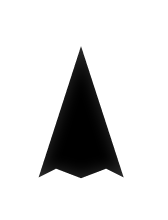

In [37]:

input_image = 'test_pic_1.png'
output_image = 'test_pic_glow.png'

add_glow5(input_image, output_image, glow_amount=4)


In [ ]:
from PIL import Image, ImageFilter, ImageEnhance


input_image = "test_pic.png"  # Replace with your image path


In [1]:
from strategies.encryptionStrategy import EncryptionStrategy

EncryptionStrategy.generate_key()


b'X3mZ0pO7HKLFUN1OKuhG2mxVXQGAoDClaeXytkp4VvM='

In [3]:
# original_data = {
#         "name": "John Doe",
#         "age": 30,
#         "email": "john@example.com",
#         "addresses": [
#             {"type": "home", "street": "123 Main St"},
#             {"type": "work", "street": "456 Business Ave"}
#         ]
#     }

# print("Original JSON data:", original_data)
    
#     # Generate and save encryption key (only do this once)
key = b'X3mZ0pO7HKLFUN1OKuhG2mxVXQGAoDClaeXytkp4VvM='
#     # Or load existing key
#     # key = load_key()
    
#     # Encrypt the JSON data
# encrypted_data = EncryptionStrategy.encrypt_json(original_data, key)
# print("\nEncrypted data:", encrypted_data)
    
#     # Save encrypted data to file
# EncryptionStrategy.save_encrypted_data(encrypted_data, 'encrypted_data.bin')
    
# Load encrypted data from file
loaded_encrypted_data = EncryptionStrategy.load_encrypted_data('encrypted_data.bin')

# Decrypt the loaded data
decrypted_data = EncryptionStrategy.decrypt_json(loaded_encrypted_data, key)
print("\nDecrypted JSON data:", decrypted_data)

# Modify the decrypted data
decrypted_data["age"] = 31
decrypted_data["addresses"].append({"type": "vacation", "street": "789 Beach Rd"})
print("\nModified JSON data:", decrypted_data)


Decrypted JSON data: {'name': 'John Doe', 'age': 30, 'email': 'john@example.com', 'addresses': [{'type': 'home', 'street': '123 Main St'}, {'type': 'work', 'street': '456 Business Ave'}]}

Modified JSON data: {'name': 'John Doe', 'age': 31, 'email': 'john@example.com', 'addresses': [{'type': 'home', 'street': '123 Main St'}, {'type': 'work', 'street': '456 Business Ave'}, {'type': 'vacation', 'street': '789 Beach Rd'}]}
